## 01. Library Installation (pandas and numpy)

Here, we will import pandas and numpy library first.

- **pandas**: open source data manipulation and powerful library.
- **numpy**: Numerical Computation. Powerful library for numerical computations in Python.

In [1]:
import pandas as pd
import numpy as np

## 02. ary Installation (matplotlib.pyplot)

01. **Matplotlib** is used to create interavctive, static and animated visualizations in python.
02. **matplotlib.pyplot**: It's a module used to create and manipulate plots.

In [2]:
import matplotlib.pyplot as plt

## 03. Library Installation (scikit-learn or sklearn)

Popular machine learning library in python. linear_model is a module to conduct linear regression models. 

In [3]:
from sklearn import linear_model

## 04. Dataframe

I uploaded this csv file in the Jupyter Notebook files section to start the process. Faced little bit of difficulties during uploading. 

In [4]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


## 05. Plotting

- **%matplotlib inline**: The %matplotlib inline command is a Jupyter Notebook magic command that allows for the inline display of matplotlib plots directly in the notebook. **It is used to enable the integration of matplotlib with the notebook interface.**


  When `%matplotlib inline` is used at the beginning of a code cell in a Jupyter Notebook, **it sets up the notebook environment to render matplotlib plots** as static images embedded within the notebook itself.










- **What is magic command?**: In Jupyter Notebook, magic commands are special commands that provide additional functionality and control over the notebook environment.

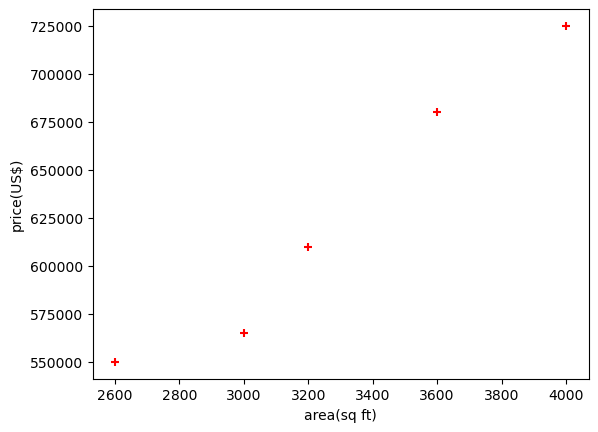

In [5]:
%matplotlib inline
plt.xlabel('area(sq ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [6]:
new_df = df.drop('price',axis = 'columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [7]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

## 06. Training Model with Data

In [8]:
#Object 'reg' has been created
reg = linear_model.LinearRegression()
#Training the model
reg.fit(new_df,price)

LinearRegression()

## 07. Output based on the Model

**([[3300]])**: Why it is using double bruckets?

The reason for using the double square brackets is that the **predict() method of a regression model in scikit-learn expects a 2D array-like input**, even if you are predicting a single value.

In [9]:
reg.predict([[3300]])

C:\Users\sy929\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

## 09. coef_

In scikit-learn, the coef_ attribute is used in linear models to access the coefficients (or weights) associated with each feature in the model.

In [10]:
reg.coef_

array([135.78767123])

## 10. intercept_

Intercept attribute is used to find the intercept of the model

In [11]:
reg.intercept_

180616.43835616432

## 11. Check the Output

y = mX + b.

Here, 
y = dependent variable (price),
X = Independent variable (area)
b = intercept,
m = coefficient

In [12]:
135.78767123*3300+180616.43835616432

628715.7534151643

## 12. Predict price of another home with 5000 sqft

In [13]:
reg.predict([[5000]])

C:\Users\sy929\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

## 13. New Example with 'areas.csv'

In [14]:
d = pd.read_csv('areas.csv')

In [15]:
d.head(5)

,area
0,1000
1,1500
2,2300
3,3540
4,4120


## 14. Predicting prices with linear regression

In [16]:
p = reg.predict(d)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [17]:
d ['prices'] = p
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


## 15. Export the csv file

In [18]:
d.to_csv('prediction.csv')

## 16. If I want to remove the index

In [19]:
d.to_csv('prediction.csv', index = 'False')

## 17. Plotting the Line 

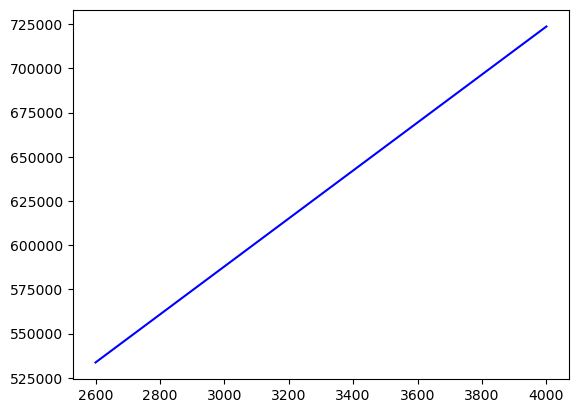

In [20]:
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

## 18. Exercise: Predict the per capita income for Canada in 2023

### 18.1. Import the csv file

In [21]:
exercise_file = pd.read_csv('canada_per_capita_income.csv')

### 18.2. Overview of the dataset

In [22]:
exercise_file.head(5)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


### 18.3. Plotting

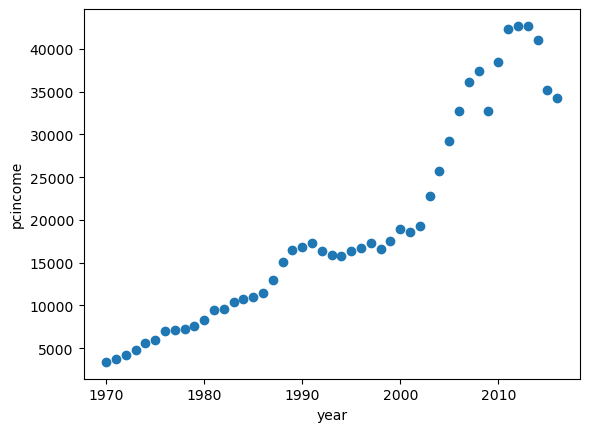

In [23]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('pcincome')
plt.scatter(exercise_file.year,exercise_file['per capita income (US$)'])

### 18.4. Training the model

In [24]:
reg = linear_model.LinearRegression()
reg.fit(exercise_file[['year']],exercise_file['per capita income (US$)'])

LinearRegression()

### 18.5. Prediction

In [25]:
reg.predict([[2023]])

C:\Users\sy929\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([43774.08932009])

### 18.6. Coefficient and intercept

In [26]:
reg.coef_

array([828.46507522])

In [27]:
reg.intercept_

-1632210.7578554575

### 18.7. Plotting the Regression Line

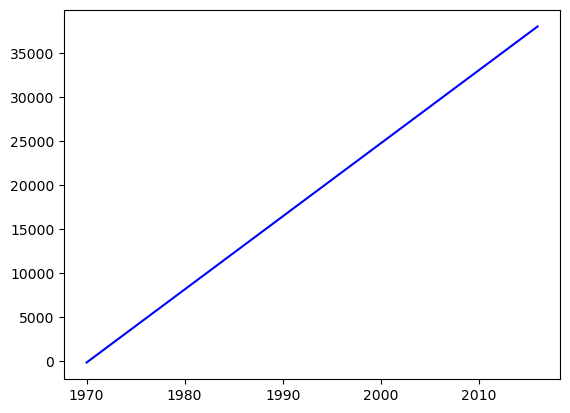

In [28]:
plt.plot(exercise_file['year'],reg.predict(exercise_file[['year']]),color='blue')

## 19. Saving model using pickle module 

In [29]:
import pickle

'pickle' is a module that provides a way to serialize and desiralize objects. 

In [31]:
with open ('model_pickle','wb') as f:
    pickle.dump(reg,f)

- `with` is a statement that ensures the file is properly closed after the suite finishes.
- `model_pickle` is a file name where data will be written.
- `wb` is a mode used for writing binary data to the file.
- `pickle_dump` functions to write objects to the file. 

In [33]:
with open ('model_pickle','rb') as f:
    mp = pickle.load(f)

In [36]:
mp.predict ([[2023]])

C:\Users\sy929\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([43774.08932009])

## 20. Save model using Joblib

In [38]:
import joblib

In [39]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [40]:
run_model_by_joblib = joblib.load('model_joblib')

In [41]:
run_model_by_joblib.predict([[2023]])

C:\Users\sy929\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([43774.08932009])